In [2]:
import os, sys, importlib

In [3]:
sys.path.append("../Functions")

In [4]:
from preprocessing_functions import *

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [6]:
series_name = "dummy_series"
data = "dummy_data.csv"

In [7]:
app_data = read_file(data)

In [8]:
ts_data = preprocess(app_data, series_name)

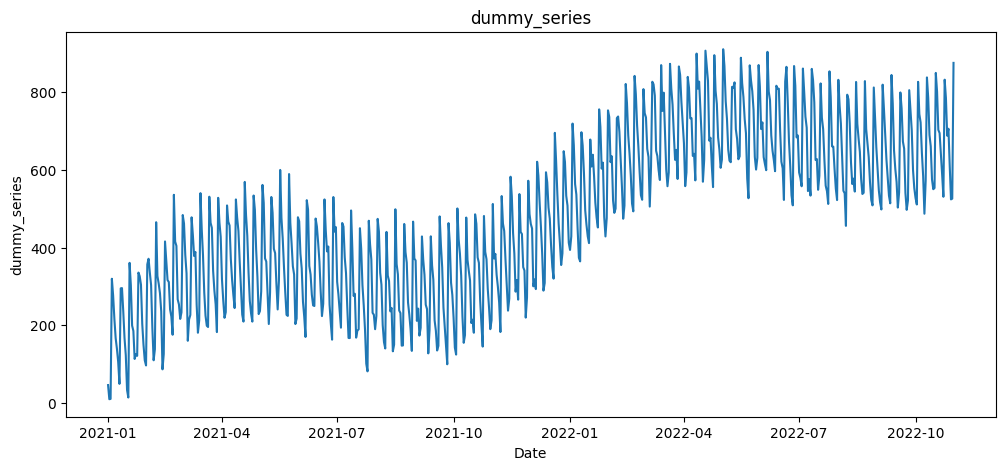

In [9]:
fig = plot_series(ts_data)

In [10]:
ts_data_weekly = resample(ts_data, "W")
ts_data_weekly = ts_data_weekly.iloc[:-1]

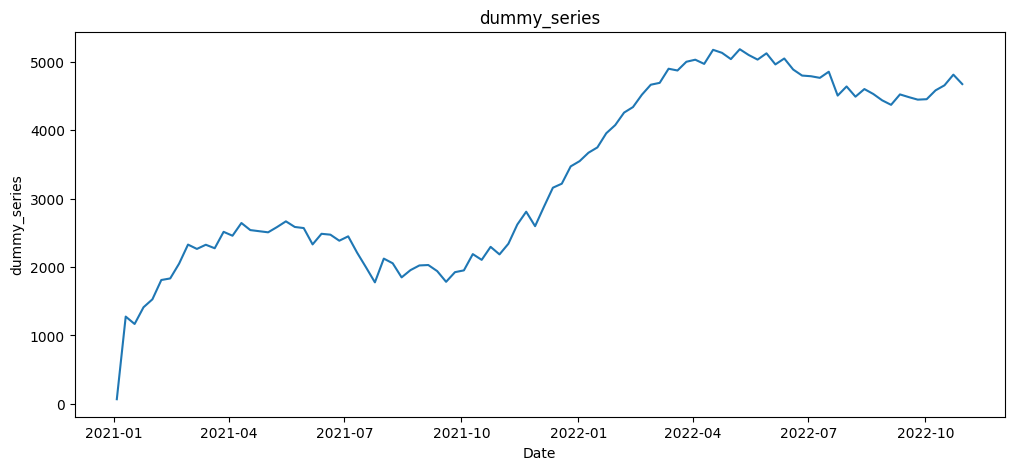

In [11]:
weekly_ts = plot_series(ts_data_weekly)

In [12]:
parent_folder = os.path.abspath(
    os.path.join(os.getcwd(), os.path.pardir, os.path.pardir)
)
md_path = parent_folder + "/docs/acf_pacf_plots/"

In [13]:
# file_name = md_path + series_name + '_weekly_ts.png'
# weekly_ts.savefig(file_name, bbox_inches = 'tight')

In [14]:
ts_data_weekly_sd_52 = difference(ts_data_weekly, length=52)

/Users/paul.carroll/Github/Forecasting_MS/src/ACF+PACF/../Functions/preprocessing_functions.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_dummy[differenced_col].iloc[i] = (


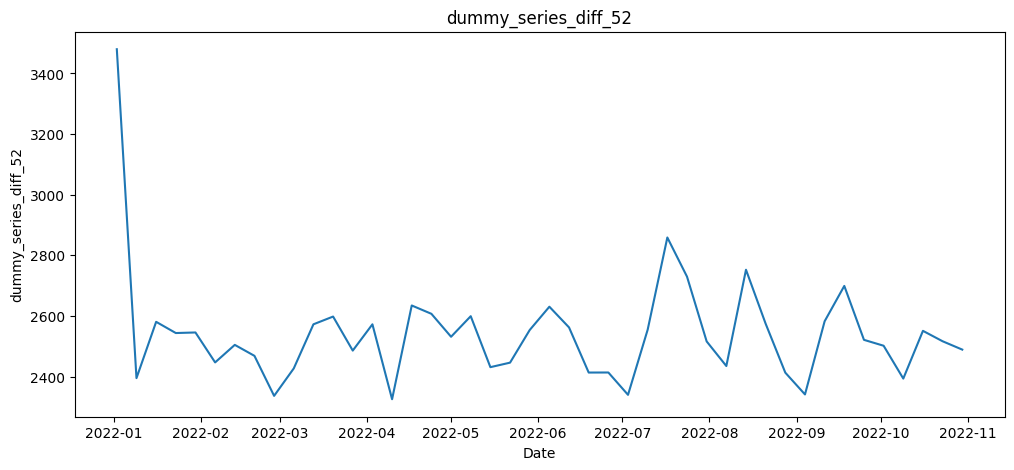

In [15]:
weekly_ts_diff_52 = plot_series(ts_data_weekly_sd_52)

In [16]:
# file_name = md_path + series_name + '_weekly_ts_diff_52.png'
# weekly_ts_diff_52.savefig(file_name, bbox_inches = 'tight')

In [17]:
ts_data_weekly_sd_52_nsd_1 = difference(ts_data_weekly_sd_52, length=1)

/Users/paul.carroll/Github/Forecasting_MS/src/ACF+PACF/../Functions/preprocessing_functions.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_dummy[differenced_col].iloc[i] = (


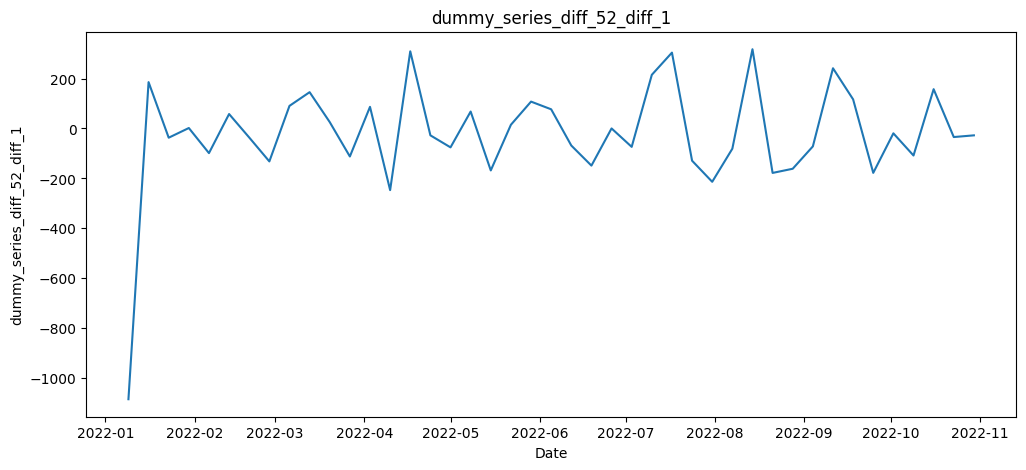

In [18]:
weekly_ts_diff_52_1 = plot_series(ts_data_weekly_sd_52_nsd_1)

In [19]:
# file_name = md_path + series_name + '_weekly_ts_diff_52_1.png'
# weekly_ts_diff_52_1.savefig(file_name, bbox_inches = 'tight')

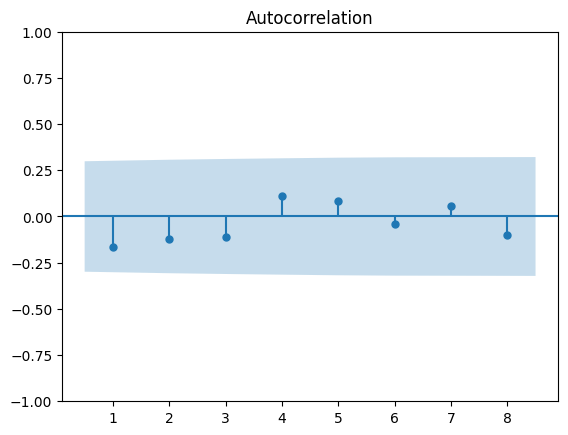

In [20]:
series_acf = plot_acf(
    ts_data_weekly_sd_52_nsd_1.iloc[:, 1].dropna(), zero=False, lags=8
);

In [21]:
# file_name = md_path + series_name + '_series_acf.png'
# series_acf.savefig(file_name, bbox_inches = 'tight')

/Users/paul.carroll/Github/Forecasting_MS/venv/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


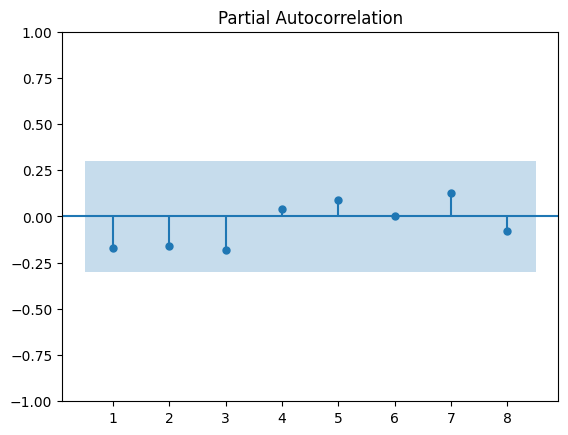

In [22]:
series_pacf = plot_pacf(
    ts_data_weekly_sd_52_nsd_1.iloc[:, 1].dropna(), zero=False, lags=8
);

In [23]:
# file_name = md_path + series_name + '_series_pacf.png'
# series_pacf.savefig(file_name, bbox_inches = 'tight')

/Users/paul.carroll/Github/Forecasting_MS/venv/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


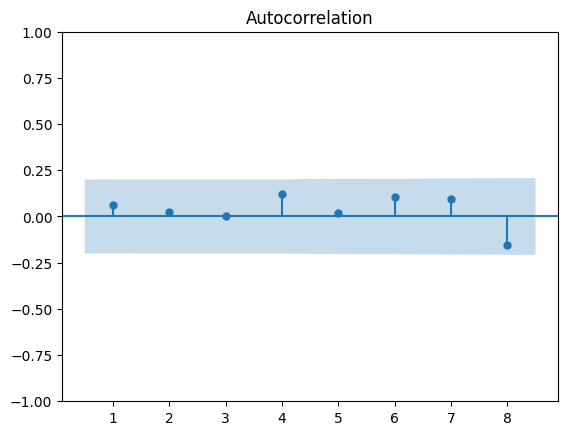

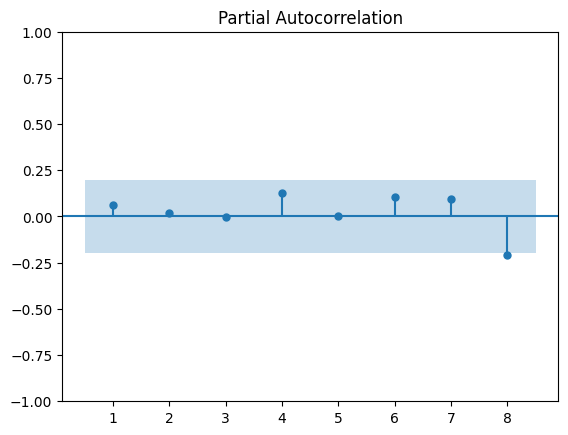

In [24]:
model = SARIMAX(
    ts_data_weekly[series_name],
    order=(0, 1, 1),
    seasonal_order=(0, 1, 0, 52),
    enforce_stationarity=False,
)
results = model.fit(disp=0)
fitted_vals = results.fittedvalues
residuals = ts_data_weekly[series_name] - fitted_vals
residual_acf = plot_acf(residuals, zero=False, lags=8)
residual_pacf = plot_pacf(residuals, zero=False, lags=8);

In [25]:
# file_name = md_path + series_name + '_residual_acf.png'
# residual_acf.savefig(file_name, bbox_inches = 'tight')

In [26]:
# file_name = md_path + series_name + '_residual_pacf.png'
# residual_pacf.savefig(file_name, bbox_inches = 'tight')

# Monthly Data

In [27]:
ts_data_monthly = resample(preprocess(app_data, series_name), "M")

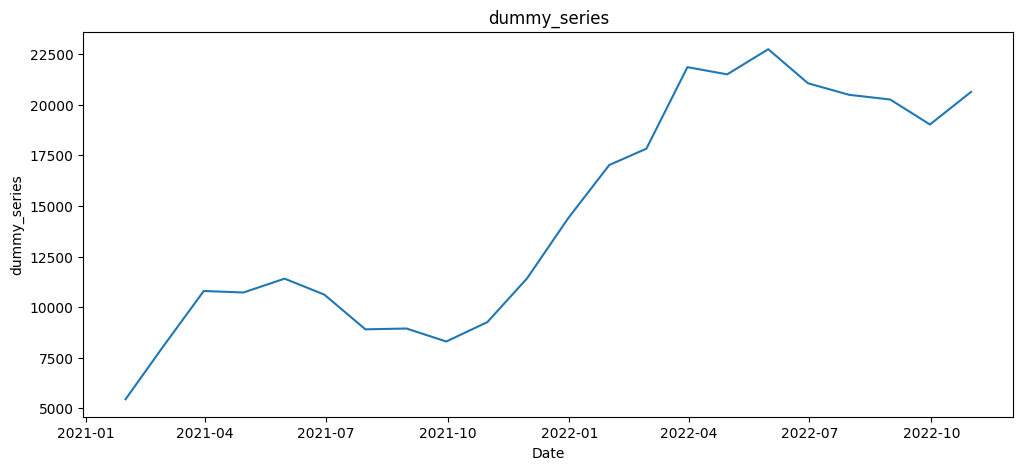

In [28]:
fig = plot_series(ts_data_monthly)

In [29]:
ts_data_monthly_sd_12 = difference(ts_data_monthly, length=12)

/Users/paul.carroll/Github/Forecasting_MS/src/ACF+PACF/../Functions/preprocessing_functions.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_dummy[differenced_col].iloc[i] = (


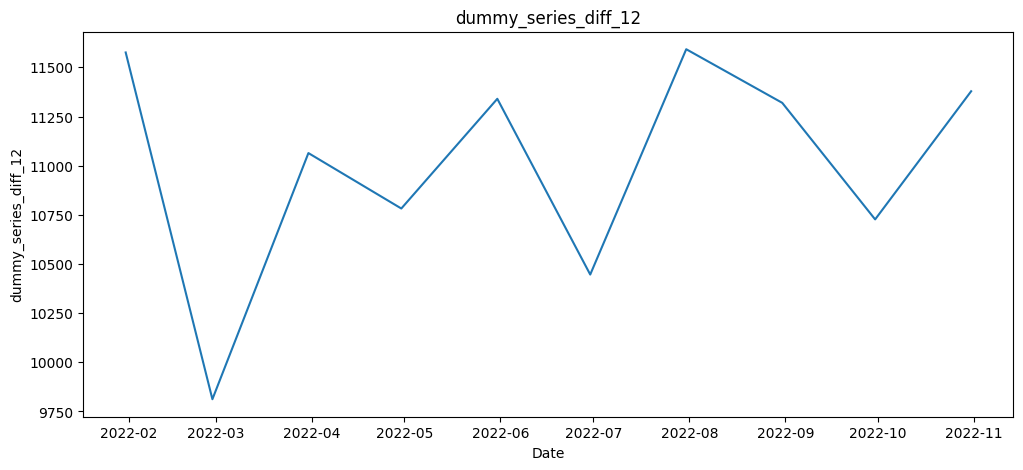

In [30]:
fig = plot_series(ts_data_monthly_sd_12)

In [31]:
ts_data_monthly_sd_12_nsd_1 = difference(ts_data_monthly_sd_12, length=1)

/Users/paul.carroll/Github/Forecasting_MS/src/ACF+PACF/../Functions/preprocessing_functions.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_dummy[differenced_col].iloc[i] = (


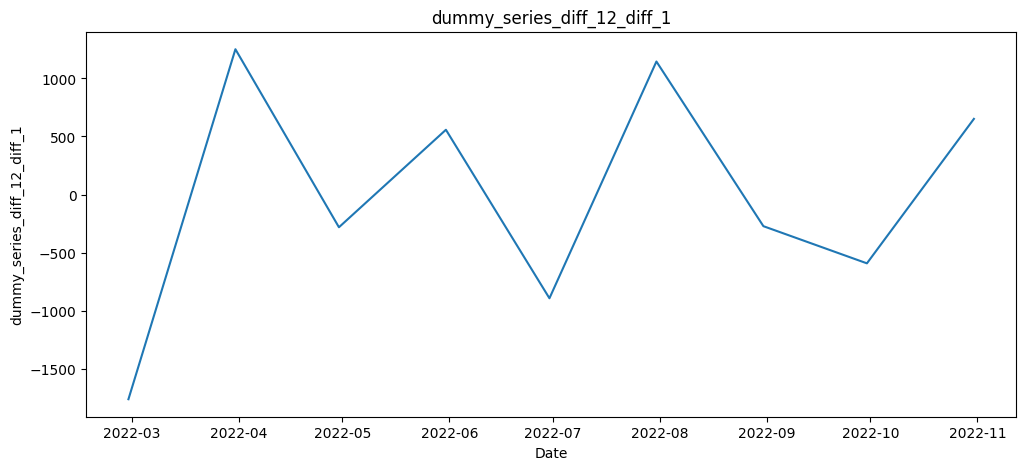

In [32]:
fig = plot_series(ts_data_monthly_sd_12_nsd_1)

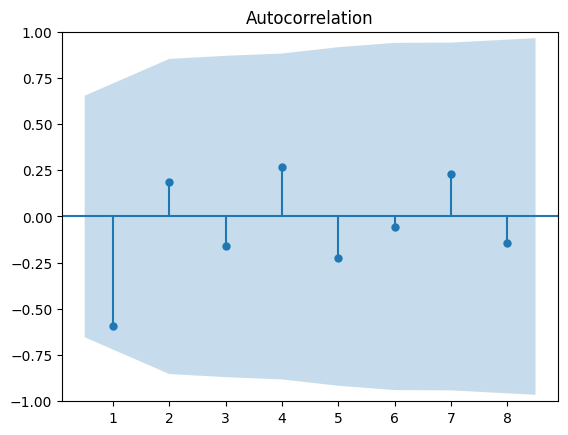

In [33]:
plot_acf(ts_data_monthly_sd_12_nsd_1.iloc[:, 1].dropna(), zero=False);

/Users/paul.carroll/Github/Forecasting_MS/venv/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


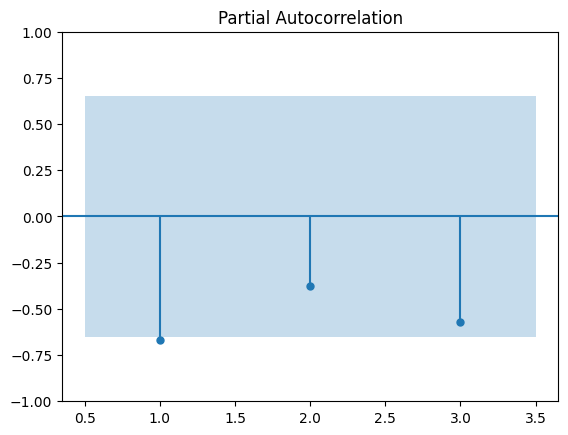

In [34]:
plot_pacf(ts_data_monthly_sd_12_nsd_1.iloc[:, 1].dropna(), zero=False, lags=3);

In [35]:
# write all the above code to a py file but not this particular cell of code.

!jupyter nbconvert --to script acf_pacf_dummy.ipynb
with open("acf_pacf_dummy.py", "r") as f:
    lines = f.readlines()
with open("acf_pacf_dummy.py", "w") as f:
    for line in lines:
        if "nbconvert --to script" in line:
            break
        else:
            f.write(line)

[NbConvertApp] Converting notebook acf_pacf_dummy.ipynb to script
[NbConvertApp] Writing 3684 bytes to acf_pacf_dummy.py
